In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
path = 'C:/Users/LEGION/Documents/Programism/Testovoe_Taras/Data.csv'
df = pd.read_csv(path)

In [48]:
df['total_renewals'] = df['total_renewals'] + 1
df['total_renewals'] = df['total_renewals'].fillna(1)

In [49]:
df.head()

,first_seen_at,last_seen_at,ip_country,media_source,app_name,latest_product,first_purchase_at,trial_start_at,trial_end_at,most_recent_purchase_at,...,trial_opt_out_at,total_renewals,total_spent,latest_store,latest_auto_renew_intent,all_purchased_product_ids,most_recent_billing_issues_at,status,has_made_a_non_subscription_purchase,app_user_id
0,1629118540413,1629118540413,AU,Source A,Generic App,com.app.year,1600512560000,1.600513e+12,1.600772e+12,1600771760000,...,1.629119e+12,1.0,83.119974,app_store,f,com.app.year,NaN,cancelled,f,099C149F-E42D-434A-8037-87309FF9B082
1,1629107961395,1629107961395,VN,NaN,Generic App,com.app.week,1629108002000,1.629108e+12,1.629367e+12,1629108002000,...,NaN,1.0,0.000000,app_store,t,com.app.week,NaN,free_trial,f,422A0FD8-7884-4AC8-A9BC-A415626C2536
2,1629100972497,1629100972497,US,NaN,Generic App,com.app.year,1629100984000,1.629101e+12,1.629360e+12,1629100984000,...,NaN,1.0,0.000000,app_store,t,com.app.year,NaN,free_trial,f,57277B09-A9A3-40C7-95F9-12B62359D5D4
3,1629099295760,1629099295761,VN,Source X,Generic App,com.app.week,1629099355000,1.629099e+12,1.629359e+12,1629099355000,...,NaN,1.0,0.000000,app_store,t,com.app.week,NaN,free_trial,f,06F2F797-6DC5-4BC6-9288-FE3748AA409B
4,1629087260960,1629087260960,US,Source B,Generic App,com.app.year,1629087300000,1.629087e+12,1.629346e+12,1629087300000,...,NaN,1.0,0.000000,app_store,t,com.app.year,NaN,free_trial,f,5BC1AC38-85D3-4380-9334-1BD940901F7D


In [50]:
df['last_seen_at'] = pd.to_datetime(df['last_seen_at'],unit='ms')
df['first_purchase_at'] = pd.to_datetime(df['first_purchase_at'],unit='ms')

In [51]:
df['LT'] = df['last_seen_at'] - df['first_purchase_at']
df['LT'] = (df['LT'] / np.timedelta64(1,'M')).astype(int)
df.sort_values(by = ['LT'], ascending = False)

,first_seen_at,last_seen_at,ip_country,media_source,app_name,latest_product,first_purchase_at,trial_start_at,trial_end_at,most_recent_purchase_at,...,total_renewals,total_spent,latest_store,latest_auto_renew_intent,all_purchased_product_ids,most_recent_billing_issues_at,status,has_made_a_non_subscription_purchase,app_user_id,LT
561,1622129723454,2021-08-01 20:10:43.878,US,Source D,Generic App,com.app.year,2020-03-28 23:25:34,1.585438e+12,1.585697e+12,1617233134000,...,2.0,139.98,app_store,f,com.app.year,NaN,cancelled,f,5DFED47F-BE02-4FC5-B1FA-73DF307A176D,16
395,1628208795290,2021-08-06 00:13:15.290,US,Source D,Generic App,com.app.year,2020-04-03 16:26:13,1.585931e+12,1.586190e+12,1585931173000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,3EA484B0-843B-41A5-B135-DF9A16E866C6,16
413,1620040669947,2021-08-05 14:00:00.161,IN,Source C,Generic App,com.app.year,2020-04-02 04:56:10,1.585803e+12,1.586063e+12,1585803370000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,5A0B9707-1975-4C96-BB88-B08A1E636521,16
794,1627400182133,2021-07-27 15:36:22.133,US,Source D,Generic App,com.app.year,2020-03-25 06:04:09,1.585116e+12,1.585375e+12,1585375449000,...,1.0,69.99,app_store,f,com.app.year,NaN,expired,f,D679D1AE-C9E8-4E84-A1B5-18404EC52003,16
70,1621602060929,2021-08-14 10:50:49.057,US,Source X,Generic App,com.app.week,2020-03-24 03:19:22,1.585020e+12,1.585279e+12,1628963824000,...,2.0,13.98,app_store,t,com.app.week,NaN,active,f,886E0CEF-1E18-483A-A978-73FF96AD1F55,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,1622757239774,2021-06-03 21:53:59.774,US,NaN,Generic App,com.app.year,2021-06-03 21:55:25,1.622757e+12,1.623017e+12,1623016525000,...,1.0,69.99,app_store,t,com.app.year,NaN,active,f,BF5F19CA-63A2-431B-A191-A334DAE96D47,0
5452,1622512163630,2021-06-03 21:58:48.158,US,Source F,Generic App,com.app.year,2021-06-01 01:50:00,1.622512e+12,1.622771e+12,1622771400000,...,1.0,69.99,app_store,t,com.app.year,NaN,active,f,16950286-6B8F-46B7-A3DA-61D74566C8E1,0
5447,1622598952286,2021-06-03 22:34:38.961,US,Source D,Generic App,com.app.year,2021-06-03 22:35:06,1.622760e+12,1.623019e+12,1622759706000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,53756458-3003-48AB-8507-9DA84619704D,0
11996,1618955794350,2021-04-20 21:56:34.351,US,NaN,Generic App,com.app.year,2021-04-20 21:58:51,1.618956e+12,1.619215e+12,1618955931000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,1C28C29F-AA5F-443D-98DA-CE836AB9BE76,0


In [52]:
country = round(df.groupby(['ip_country'], as_index = False).agg({'LT' : 'mean'}), 2)
country.head()

,ip_country,LT
0,AE,1.56
1,AG,3.00
2,AM,9.00
3,AR,6.00
4,AT,0.00


In [53]:
#Count purchases
country_sum_purch = df.groupby(['ip_country'], as_index = False).agg({'total_renewals' : 'sum'}) \
                                                                 .sort_values(by=['total_renewals'], ascending = False)
country_sum_purch.head()

,ip_country,total_renewals
115,US,12121.0
38,GB,1656.0
5,AU,460.0
19,CA,425.0
48,ID,113.0


In [54]:
#Count repeat purchases
country_repeat_purch = df.groupby(['ip_country'], as_index = False).agg({'total_renewals' : 'mean'})
country_repeat_purch = country_repeat_purch.rename(columns={'total_renewals': 'repeat_purch'})
country_repeat_purch.head(5)

,ip_country,repeat_purch
0,AE,1.291667
1,AG,1.000000
2,AM,1.000000
3,AR,1.000000
4,AT,2.500000


In [55]:
#Считаем Revenue
country_revenue = df.groupby(['ip_country'], as_index = False).agg({'total_spent' : 'sum'}) \
                                                               .sort_values(by = ['total_spent'], ascending = False)
country_revenue = round(country_revenue.rename(columns={'total_spent': 'revenue'}), 2)
country_revenue.head()

,ip_country,revenue
115,US,355232.46
38,GB,47433.51
5,AU,18702.06
19,CA,14966.00
85,NZ,4221.87


In [56]:
#Count of users
count_users = df.groupby(['ip_country'], as_index = False).agg({'app_user_id' : 'count'}) \
                                                                 .sort_values(by=['app_user_id'], ascending = False)
count_users = count_users.rename(columns={'app_user_id' : 'users_count'})
count_users.head()

,ip_country,users_count
115,US,9461
38,GB,1077
5,AU,254
19,CA,247
85,NZ,60


In [57]:
#Count of clients
customer_df = df.query('total_spent > 0')
customer_count = customer_df.groupby(['ip_country'], as_index = False).agg({'app_user_id' : 'count'}) \
                                                                 .sort_values(by=['app_user_id'], ascending = False)
customer_count = customer_count.rename(columns={'app_user_id' : 'customer_count'})
customer_count

,ip_country,customer_count
101,US,4623
33,GB,442
16,CA,178
5,AU,178
73,NZ,46
...,...,...
66,MV,1
11,BH,1
75,PA,1
76,PE,1


In [58]:
#merge
country_merged = country.merge(country_repeat_purch, on = 'ip_country')
country_merged = country_merged.merge(country_sum_purch, on = 'ip_country')
country_merged = country_merged.sort_values(by = 'total_renewals', ascending = False)
country_merged = country_merged.merge(country_revenue, on = 'ip_country')
country_merged = country_merged.merge(count_users, on = 'ip_country')
country_merged = country_merged.merge(customer_count, on = 'ip_country')
country_merged.head(5)

,ip_country,LT,repeat_purch,total_renewals,revenue,users_count,customer_count
0,US,2.07,1.281154,12121.0,355232.46,9461,4623
1,GB,2.48,1.537604,1656.0,47433.51,1077,442
2,AU,5.91,1.811024,460.0,18702.06,254,178
3,CA,5.02,1.720648,425.0,14966.00,247,178
4,ID,4.60,5.650000,113.0,1350.95,20,11


In [59]:
#count the average check
country_merged['avg_check'] = round(country_merged['revenue'] / country_merged['total_renewals'], 2)
country_merged.head()

,ip_country,LT,repeat_purch,total_renewals,revenue,users_count,customer_count,avg_check
0,US,2.07,1.281154,12121.0,355232.46,9461,4623,29.31
1,GB,2.48,1.537604,1656.0,47433.51,1077,442,28.64
2,AU,5.91,1.811024,460.0,18702.06,254,178,40.66
3,CA,5.02,1.720648,425.0,14966.00,247,178,35.21
4,ID,4.60,5.650000,113.0,1350.95,20,11,11.96


In [60]:
#Count CR (convertion rate)
country_merged['CR'] = round(country_merged['customer_count'] / country_merged['users_count'], 2)
country_merged.head()

,ip_country,LT,repeat_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR
0,US,2.07,1.281154,12121.0,355232.46,9461,4623,29.31,0.49
1,GB,2.48,1.537604,1656.0,47433.51,1077,442,28.64,0.41
2,AU,5.91,1.811024,460.0,18702.06,254,178,40.66,0.70
3,CA,5.02,1.720648,425.0,14966.00,247,178,35.21,0.72
4,ID,4.60,5.650000,113.0,1350.95,20,11,11.96,0.55


In [62]:
#Count ARPPU
country_merged['ARPPU'] = round(country_merged['repeat_purch'] * country_merged['avg_check'] ,2)
country_merged.head()

,ip_country,LT,repeat_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR,ARPPU
0,US,2.07,1.281154,12121.0,355232.46,9461,4623,29.31,0.49,37.55
1,GB,2.48,1.537604,1656.0,47433.51,1077,442,28.64,0.41,44.04
2,AU,5.91,1.811024,460.0,18702.06,254,178,40.66,0.70,73.64
3,CA,5.02,1.720648,425.0,14966.00,247,178,35.21,0.72,60.58
4,ID,4.60,5.650000,113.0,1350.95,20,11,11.96,0.55,67.57


In [63]:
country_merged['ARPU'] = round(country_merged['ARPPU'] * country_merged['CR'] ,2)
country_merged.head()

,ip_country,LT,repeat_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR,ARPPU,ARPU
0,US,2.07,1.281154,12121.0,355232.46,9461,4623,29.31,0.49,37.55,18.40
1,GB,2.48,1.537604,1656.0,47433.51,1077,442,28.64,0.41,44.04,18.06
2,AU,5.91,1.811024,460.0,18702.06,254,178,40.66,0.70,73.64,51.55
3,CA,5.02,1.720648,425.0,14966.00,247,178,35.21,0.72,60.58,43.62
4,ID,4.60,5.650000,113.0,1350.95,20,11,11.96,0.55,67.57,37.16


In [64]:
#Count top 10 of countries by ARPU
top_10 = country_merged.sort_values(by = ('ARPU'), ascending = False).head(10)

<AxesSubplot:xlabel='ARPU', ylabel='ip_country'>

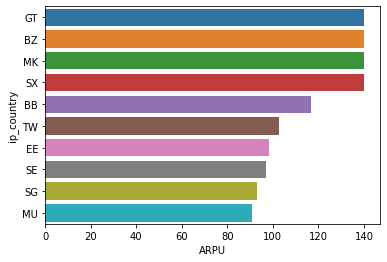

In [65]:
sns.barplot(x="ARPU", y="ip_country", data=top_10)


<AxesSubplot:xlabel='ARPU', ylabel='ip_country'>

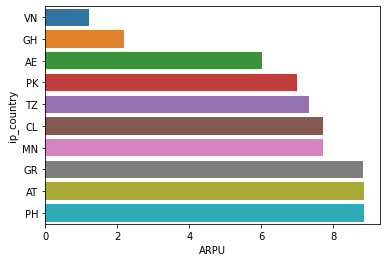

In [66]:
#Count top 10 of countries by lowest ARPU
top_lowest_10 = country_merged.sort_values(by = ('ARPU'), ascending = True).head(10)

sns.barplot(x="ARPU", y="ip_country", data=top_lowest_10)

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ARPU', ylabel='Density'>

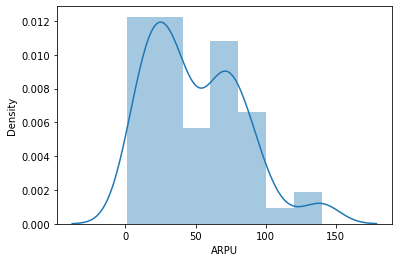

In [72]:
sns.distplot(country_merged['ARPU'])